In [1]:

#A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle.

'''
They are the same as the ARIMA model; specifically:

p: Trend autoregression order.
d: Trend difference order.
q: Trend moving average order.
'''

'''
There are four seasonal elements that are not part of ARIMA that must be configured; they are:

P: Seasonal autoregressive order.
D: Seasonal difference order.
Q: Seasonal moving average order.
m: The number of time steps for a single seasonal period.

ARMA model:(p,q)
ARIMA model:(p,d,q)
SARIMA model:(p,d,q)(sp,sd,sq,s)
ARIMAX model:(p,d,q) + exog
SARIMAX model:(p,d,q)(sp,sd,sq,s) +exog

'''

import warnings
warnings.filterwarnings("ignore")

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pandas as pd
import numpy as np

timestamp
2019-11-14     8725
2019-11-15    16612
2019-11-16     6010
2019-11-17     8845
2019-11-18    10527
Name: steps, dtype: int64


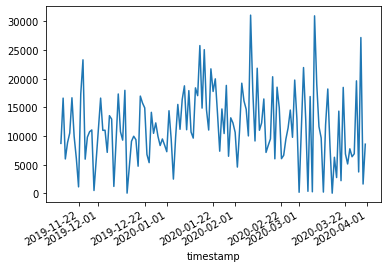

In [3]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
#series = read_csv('./Input/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = pd.read_csv('p14_steps.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())
series.plot()
pyplot.show()

In [4]:
X = series.values
#X = log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.242033
p-value: 0.000000
	1%: -3.480
	5%: -2.883
	10%: -2.578


In [5]:
#https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
from statsmodels.tsa.seasonal import seasonal_decompose

#result = seasonal_decompose(series, model='multiplicative')
#result.plot()
#pyplot.show()

In [6]:
#result = seasonal_decompose(series, model='additive')
#result.plot()
#pyplot.show()

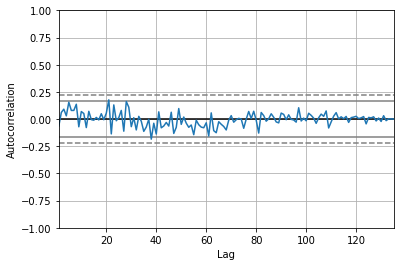

In [7]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
pyplot.show()

In [8]:
import statsmodels.api as sm
'''
# define model configuration
my_order = (10, 2, 4)
my_seasonal_order = (1, 1, 1, 12)

# fit model
model = sm.tsa.statespace.SARIMAX(series, order=my_order, seasonal_order=my_seasonal_order)
model_fit = model.fit()
'''

'\n# define model configuration\nmy_order = (10, 2, 4)\nmy_seasonal_order = (1, 1, 1, 12)\n\n# fit model\nmodel = sm.tsa.statespace.SARIMAX(series, order=my_order, seasonal_order=my_seasonal_order)\nmodel_fit = model.fit()\n'

In [9]:
# summary of fit model
#print(model_fit.summary())

In [10]:
# line plot of residuals
'''
from pandas import DataFrame

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
'''

'\nfrom pandas import DataFrame\n\nresiduals = DataFrame(model_fit.resid)\nresiduals.plot()\npyplot.show()\n'

In [11]:
# density plot of residuals
#residuals.plot(kind='kde')
#pyplot.show()

In [12]:
# summary stats of residuals
#print(residuals.describe())

In [13]:
#series.index = series.index.to_period('M')

In [14]:
import time

start = time.time()

# split into train and test sets
X = series.values.astype('float32')
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

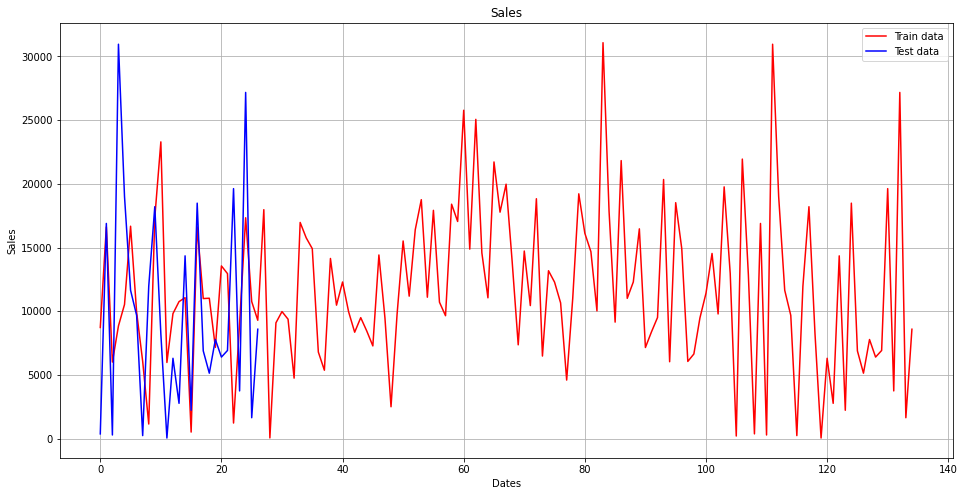

In [15]:
pyplot.figure(figsize=(16,8))
pyplot.grid(True)
pyplot.xlabel('Dates')
pyplot.ylabel('Sales')
pyplot.plot(X, 'red', label='Train data')
pyplot.plot(test, 'blue', label='Test data')
pyplot.legend()
pyplot.title('Sales')
pyplot.show()

In [16]:
# define model configuration
import warnings
warnings.filterwarnings("ignore")

my_order = (1, 0, 0)
my_seasonal_order = (0, 0, 0, 0)

# walk-forward validation
for t in range(len(test)):
	model = sm.tsa.statespace.SARIMAX(series, order=my_order, seasonal_order=my_seasonal_order)
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
    
end = time.time()

KeyError: 0

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# evaluate forecasts
mse = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
elapsed = end - start
print("Time elapsed:" +str(elapsed)+" s")
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()